In [ ]:
!pip install matplotlib scikit_learn pandas -q

Iris Dataset

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Loading the Iris Flower dataset
iris = load_iris()
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

In [ ]:
# Quick look at the data
print("First 5 rows of the dataset : ")
print(x.head())

First 5 rows of the dataset : 
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [ ]:
print(x)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [ ]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int64


In [ ]:
# Target classes
print("Target classes : ", iris.target_names)

Target classes :  ['setosa' 'versicolor' 'virginica']


In [ ]:
 #train-Test-Split
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict
y_pred = model.predict(x_test)

In [ ]:
# Evaluation
print("Classification Report : ")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Classification Report : 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(cm)

Confusion Matrix : 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


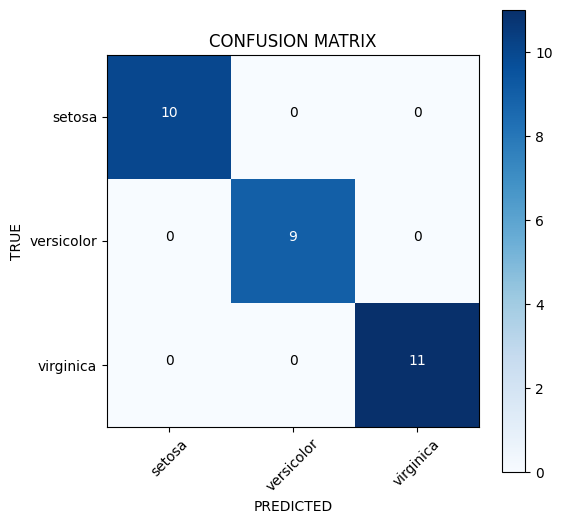

In [ ]:
# Vizualization of Confusion Matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("CONFUSION MATRIX")
plt.colorbar()
tick_marks = range(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation = 45)
plt.yticks(tick_marks, iris.target_names)

# Add text annotations to the values
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

# Labels
plt.xlabel("PREDICTED")
plt.ylabel("TRUE")
plt.show()